Занятие 5. Проверка статистических гипотез.
====================

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для нормальных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для переменных в ранговой шкале: корреляция Спирмэна [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html).<br>
  * Для переменных в ранговой шкале: корреляция Кендалла
[scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html).<br>
  


Большинство из этих функций вовзращает два значения, хотя изредка бывает и больше. Но всегда первое из них -- значение статистики критерия, второе -- p-value. Нам будет интересно именно p-value.

Замечание. В реализациях критериев Стьюдента и Манна-Уитни-Уилкоксона нет возможности задать одностороннюю альтернативную гипотезу. В этих случаях нулевую гипотезу нужно отвергать, если $\frac{\text{p-value}}{2} < \alpha$.

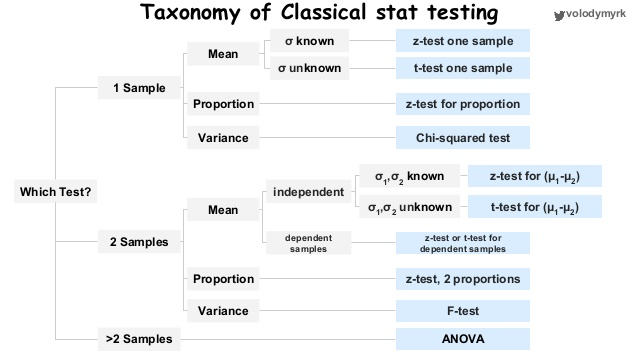

In [18]:
from IPython.display import Image
# https://www.slideshare.net/vladimirkazantsev/how-to-concludeonlineexperimentsinpython
Image("stat_tests.jpg")

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#  matplotlib.style.use('ggplot')
%matplotlib inline

In [8]:
from scipy import stats

In [9]:
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_03_hypothesis")



Пример 1. Проверка нормальности распределения
---------------------------------

In [19]:
town = pd.read_csv('town_1959_2.csv', encoding='cp1251')
town = town.set_index(u'номер')

(array([  1.,   8.,  24., 127., 408., 302.,  88.,  33.,  11.,   2.]),
 array([-1.        , -0.52970528, -0.05941055,  0.41088417,  0.8811789 ,
         1.35147362,  1.82176835,  2.29206307,  2.7623578 ,  3.23265252,
         3.70294725]),
 <a list of 10 Patch objects>)

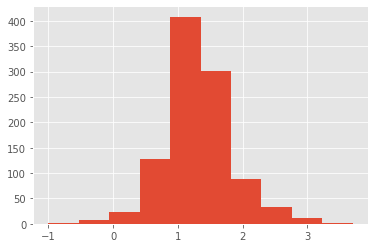

In [20]:
plt.hist(np.log10(town[u'население']))

In [21]:
res = stats.shapiro(np.log10(town[u'население']))
print('p-value: ', res[1])

p-value:  3.1486824866172602e-12


p-value получился маленьким (меньше $\alpha = 0.01, 0.05$). А почему получилось не нормальное распределение? Гистограмма же была колоколообразной. Станет понятнее, если увеличить число столбцов.

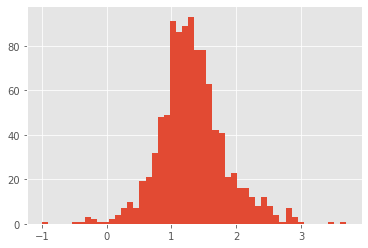

In [22]:
plt.hist(np.log10(town[u'население']), bins=50);

In [23]:
x = np.log10(town[u'население'])

#  Параметры распределения: 
#  математическое ожидание и стандартное отклонение
mu = np.mean(x)
sigma = np.std(x)

#  Решетка точек для построения графика функции
x_1 = np.linspace(np.min(x), np.max(x), 300)


Text(2.0, 0.9, '$f(x) = \\frac{\\exp(-(x-\\mu)^2/2*\\sigma^2)}{\\sigma*\\sqrt{2*\\pi}}$')

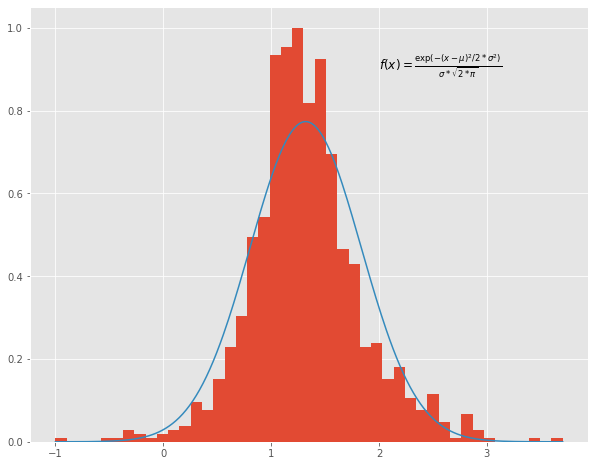

In [24]:
#  Построим гистограмму
#  Добавим график плотности нормального распределения

plt.figure(figsize=(10,8))
pd.Series(x).hist(bins=45, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))

#  Пример добавления подписей на графике
plt.text(2.0, 0.9, r'$f(x) = \frac{\exp(-(x-\mu)^2/2*\sigma^2)}{\sigma*\sqrt{2*\pi}}$',
        fontsize=12)

#  plt.savefig("KDE_pres_05.png")

Вопрос: Перечислите отклонения от нормальности

Пример 2. Критерий Манна-Уитни. Дома в Альбукерке (на углу VS не на углу)
===============

In [5]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')

In [6]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Хотим проверить, что цены домов на углу (```COR = 1```) отличаются от цен домов не на углу (```COR = 0```). Хотим попробовать применить критерий Стьюдента, но предварительно нужно:
1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

Очевидно, что значение -9999 здесь употребляется в качестве пустого значения. Нужно заменить его на корректное пустое значение.

In [7]:
df = df.replace(-9999, np.nan)

In [8]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [9]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

Проверяем нормальность распределений. 

In [10]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

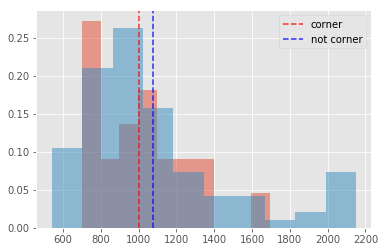

In [11]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (красной) гистограмме это не поможет. Выброс у неё всего один, и его удаление не сделает данные более нормальными: слишком уж большой крайний левый столбик. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (дома). Поэтому нам остаётся критерий Манна-Уитни.

In [13]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.40220407862126695


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: цены домов различаются незначимо -- разница медиан в выборках вызвана случайными отклонениями.

Пример 3. Дома в Альбукерке (северо-восток VS остальные)
=========================

In [14]:
# df загружен в предыдущем примере
x = df[df['NE'] == 1]['PRICE']
y = df[df['NE'] == 0]['PRICE']
x.name, y.name = 'NE', 'not NE'

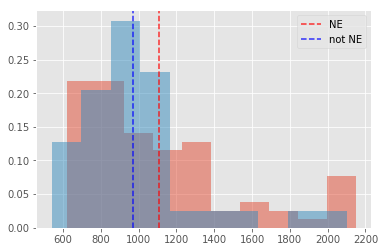

In [15]:
two_histograms(x, y)

In [16]:
# stats.median_test(x, y)

In [16]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.052720404934078396


### Пример 4. Критерий Стьюдента для независимых выборок. 
#### Возраст, в котором умирают европейские аристократы.

Данные о возрасте, в котором умирали европейцы в середине 19 века, в зависимости от их класса (sovereignty, aristocracy, and gentry).

In [12]:
df = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None, names=['group', 'age', 'index'])

In [13]:
df.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [19]:
print(df)

     group  age  index
0     aris   21      1
1     aris   21      2
2     aris   21      3
3     aris   21      4
4     aris   21      5
5     aris   21      6
6     aris   21      7
7     aris   22      8
8     aris   22      9
9     aris   22     10
10    aris   22     11
11    aris   22     12
12    aris   22     13
13    aris   22     14
14    aris   22     15
15    aris   23     16
16    aris   23     17
17    aris   23     18
18    aris   23     19
19    aris   23     20
20    aris   23     21
21    aris   23     22
22    aris   23     23
23    aris   23     24
24    aris   23     25
25    aris   23     26
26    aris   23     27
27    aris   23     28
28    aris   23     29
29    aris   23     30
...    ...  ...    ...
6156  sovr   84   1411
6157  sovr   84   1412
6158  sovr   84   1413
6159  sovr   84   1414
6160  sovr   84   1415
6161  sovr   84   1416
6162  sovr   84   1417
6163  sovr   85   1418
6164  sovr   86   1419
6165  sovr   86   1420
6166  sovr   86   1421
6167  sovr 

In [16]:
x = df[df['group'] == 'gent']['age']
y = df[df['group'] == 'aris']['age']
x.name, y.name = 'gent', 'aris'

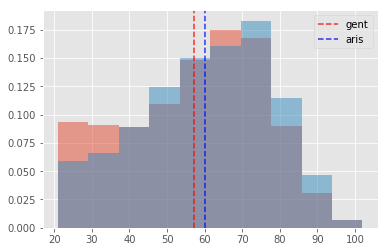

In [17]:
two_histograms(x, y)

Данные несущественно отклоняются от нормальности. 

Критерием Флигнера-Килина проверим, равны ли дисперсии.

In [18]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.07175470867996385


Значение p-value больше уровня значимости 0.05, поэтому гипотезу о равенстве дисперсий не отвергаем. В двух выборках находятся разные  объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=True```.

In [20]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  1.4225217347727537e-08


###  Пример 5. Критерий Стьюдента для парных выборок. 

#### Чтение названий цветов


Исследование 1935 года, в котором изучалась скорость распознавания названий цветов в зависимости от цвета шрифта.

In [3]:
df = pd.read_csv('interference.csv')

In [7]:
#  Все нормально?
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [8]:
x = df['DiffCol']
y = df['Black']
x.name, y.name = 'DiffCol', 'Black'

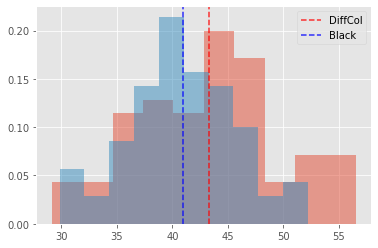

In [11]:
two_histograms(x, y)

Распределения несущественно отличаются от нормальных.  Поскольку в столбцах содержатся данные об одних и тех же испытуемых, выборки парные, а значит используем ```ttest_rel```.

In [12]:
res = stats.ttest_rel(x, y)
print('p-value: ', res[1])

p-value:  0.0162416779538072


p-value мало, но ситуация пограничная. При уровне значимости 0.05 гипотеза будет отвергнута, при уровне равном 0.01 уже нет. 

Исследователю рекомендуется выбирать величину уровня значимости до того, как он увидит p-значение. Его выбор зависит от того, насколько сильно он боится ошибки первого рода, насколько сильно он должен ручаться за выводы.

Как мы будем описывать результат анализа заказчику?
Цвет текста замедляет реакцию при уровне значимости 0.05.
Цвет текста не влияют на реакцию при уровне значимости 0.01.


Заметим, гипотеза нормальности не отвергается как для переменной x, так и для переменной y 

In [16]:
res2 = stats.shapiro(x)
print('Для переменной x p-value: ', res2[1])

res3 = stats.shapiro(y)
print('Для переменной y p-value: ', res3[1])

Для переменной x p-value:  0.7196102142333984
Для переменной y p-value:  0.8271005749702454


#### Как выглядит проверка гипотезы о равенстве медиан для парных выборок?

In [39]:
stats.wilcoxon(x, y, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=845.0, pvalue=0.02000561266008937)

Пример 6. Популярность кандидата.

... Проверять будем критерием хи-квадрат. Сначала построим таблицу сопряжённости.

Пример удален

Пример 7. Корреляция цены и площади домов в Альбукерке.
--------------------

In [25]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [26]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Проверим очевидный факт, что площадь дома коррелирует с его ценой.

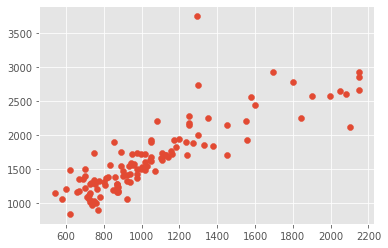

In [27]:
plt.scatter(df['PRICE'], df['SQFT'])

In [28]:
res = stats.pearsonr(df['PRICE'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8447950985552122
p-value:  5.1463457076294135e-33


In [29]:
res = stats.spearmanr(df['PRICE'], df['SQFT'], axis=0, nan_policy='propagate')
print('Spearman rho: ', res[0])
print('p-value: ', res[1])



Spearman rho:  0.8741686749512637
p-value:  7.116503153899996e-38


In [30]:
res = stats.kendalltau(df['PRICE'], df['SQFT'], nan_policy='propagate')
print('Kendall tau: ', res[0])
print('p-value: ', res[1])



Kendall tau:  0.6954339958374737
p-value:  1.4484759425566665e-28


In [37]:
#  Внимание!  Процедура неестественно работает с NA

df = df.replace(-9999, np.nan)

res = stats.pearsonr(df['TAX'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  nan
p-value:  1.0


C:\Users\abbat_VL\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [3]:
np.nan + 5

nan

nan

In [14]:
#  Со средним арифметическим разработчики работают непоследовательно.
#  Почему мы должны помнить все эти мелочи?

zzz1 = [1.0, 3.0, np.nan]
zzz = pd.DataFrame(data=zzz1, columns=['zzz1'])

#  Среднее арифметическое в Numpy
print(np.mean(zzz1))
#  Среднее арифметическое в Pandas
print(zzz['zzz1'].mean())

nan
2.0
